Pre Data Cleaning Steps:
1. Make sure you have a column 'Time' this should be calculated by multiplying: Frame# * 60 * 8 
2. Make sure you have a Microglia ID column
3. Make sure you have a Speed column, originally this is output in seconds. For our purposes multiply by 60 to calculate the speed per minute

/var/folders/54/7byrywl93ynbd42k_q4n9b6w0000gn/T/ipykernel_220/3167777207.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(ids))


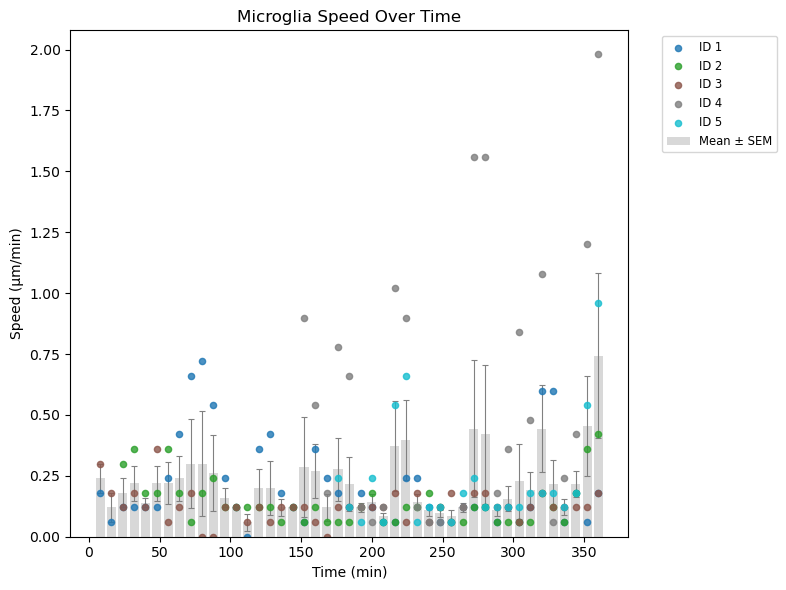

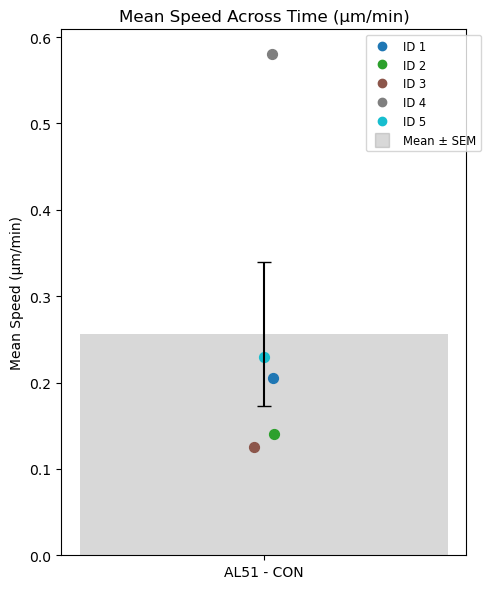

In [13]:
#Speed over time plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your data
# Replace 'data.csv' with actual CSV filename/path
PATH = '/Users/alexlawson/Masters-Data-Final/Live-imaging/Results/Statistics/Combined Stats/CON/Unknown/AL51/Speed.csv'
df = pd.read_csv(PATH)
# 2. Compute per‑timepoint summary (mean ± SEM)
summary = df.groupby('Time')['Speed'].agg(['mean','sem']).reset_index()

# 3. Compute bar width (80% of median spacing)
time_diff = summary['Time'].diff().median()
bar_width = time_diff * 0.8 if not np.isnan(time_diff) else 0.5

# 4. Create a consistent color map for MicrogliaID
ids = sorted(df['MicrogliaID'].unique())
cmap = plt.cm.get_cmap('tab10', len(ids))
color_dict = {mid: cmap(i) for i, mid in enumerate(ids)}

# --- First plot: Speed over time with mean±SEM bars ---
fig, ax = plt.subplots(figsize=(8,6))

ERROR_KW = dict(
    ecolor='grey',     # match your bar outline
    elinewidth=0.8,    # thinner vertical line
    capsize=2.0,       # shorter caps (in points)
    capthick=0.8       # thinner cap lines
)

# a) mean±SEM bars
ax.bar(
    summary['Time'],
    summary['mean'],
    width=bar_width,
    yerr=summary['sem'],
    error_kw=ERROR_KW,     # <— add this
    capsize=5,
    alpha=0.3,
    color='grey',
    zorder=1,
    label='Mean ± SEM'
)

# b) individual cell scatter
for mid in ids:
    grp = df[df['MicrogliaID'] == mid]
    ax.scatter(
        grp['Time'],
        grp['Speed'],
        s=20,
        alpha=0.8,
        color=color_dict[mid],
        label=f'ID {mid}',
        zorder=2
    )

ax.set_xlabel('Time (min)')
ax.set_ylabel('Speed (µm/min)')
ax.set_title('Microglia Speed Over Time')
ax.legend(bbox_to_anchor=(1.05,1), fontsize='small')
plt.tight_layout()
plt.show()


# --- Second plot: Overall mean ± SEM + per-cell means with jitter ---
# 5. Per-cell mean & SEM
per_cell = df.groupby('MicrogliaID')['Speed'].agg(['mean','sem']).reset_index()
overall_mean = per_cell['mean'].mean()
overall_sem = per_cell['mean'].sem()

fig, ax = plt.subplots(figsize=(5,6))


# a) bar for overall mean ± SEM
ax.bar(
    1,
    overall_mean,
    width=0.3,
    yerr=overall_sem,
    capsize=5,
    alpha=0.3,
    color='grey',
    label='Mean ± SEM'
)

# b) scatter per-cell means with horizontal jitter
jitter_strength = 0.01
x_jitter = np.random.normal(0, jitter_strength, size=len(per_cell))
for i, row in per_cell.iterrows():
    mid = row['MicrogliaID']
    ax.scatter(
        1 + x_jitter[i],
        row['mean'],
        color=color_dict[mid],
        s=50,
        label=f'ID {mid}'
    )

# c) tidy up axes & legend
ax.set_xticks([1])
ax.set_xticklabels(['AL51 - CON'])
ax.set_ylabel('Mean Speed (µm/min)')
ax.set_title('Mean Speed Across Time (µm/min)')
# Build a custom legend to avoid duplicates
handles = [
    plt.Line2D([0],[0], marker='o', color=color_dict[mid], label=f'ID {mid}',
               markersize=6, linestyle='None')
    for mid in ids
]
handles += [
    plt.Line2D([0],[0], marker='s', color='grey', label='Mean ± SEM',
               alpha=0.3, markersize=10, linestyle='None')
]
ax.legend(handles=handles, bbox_to_anchor=(1.05,1), fontsize='small')
plt.tight_layout()
plt.show()

/var/folders/54/7byrywl93ynbd42k_q4n9b6w0000gn/T/ipykernel_220/2882025588.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(ids))


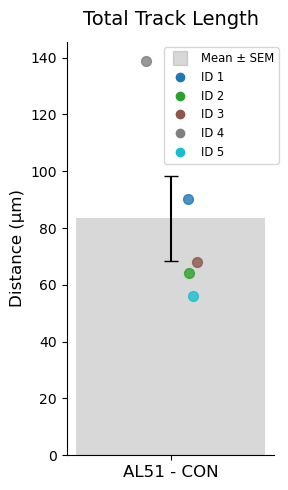

In [11]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === User‐defined parameters ===
FILE_PATH = "/Users/alexlawson/Masters-Data-Final/Live-imaging/Results/Statistics/Combined Stats/CON/Unknown/AL51/Track_Length.csv"
ID_COL = "MicrogliaID"
VALUE_COL = "Track Length"
XTICK_LABEL = "AL51 - CON"
Y_LABEL = "Distance (µm)"
PLOT_TITLE = "Total Track Length"
SAVE_PATH = None    # e.g. "output.png" or None to display

def plot_microglia():
    # 1) Load & clean
    df = pd.read_csv(FILE_PATH, encoding='latin1')
    df = df.dropna(subset=[ID_COL, VALUE_COL])  # drop any missing IDs or values

    # 2) Prepare color map for IDs
    ids = sorted(df[ID_COL].unique())
    cmap = plt.cm.get_cmap('tab10', len(ids))
    color_dict = {mid: cmap(i) for i, mid in enumerate(ids)}

    # 3) Extract the raw values
    data = df[[ID_COL, VALUE_COL]].copy()
    values = data[VALUE_COL].astype(float).values

    # 4) Compute summary stats
    mean_val = np.mean(values)
    sem_val  = np.std(values, ddof=1) / np.sqrt(len(values))

    # 5) Make the figure
    fig, ax = plt.subplots(figsize=(3,5))

    # a) Grey bar for overall mean ± SEM
    ax.bar(
        0,
        mean_val,
        yerr=sem_val,
        capsize=5,
        color='grey',
        alpha=0.3,
        width=0.4,
        label='Mean ± SEM'
    )

    # b) Jittered, colored dots per cell
    jitter_strength = 0.05
    for i, mid in enumerate(ids):
        grp = data.loc[data[ID_COL] == mid, VALUE_COL].values
        # If a cell only has one value, still jitter it once
        x_jitter = np.random.normal(0, jitter_strength, size=len(grp))
        ax.scatter(
            np.zeros_like(grp) + x_jitter,
            grp,
            color=color_dict[mid],
            s=50,
            alpha=0.8,
            label=f'ID {mid}'
        )

    # 6) Styling
    ax.set_xticks([0])
    ax.set_xticklabels([XTICK_LABEL], fontsize=12)
    ax.set_ylabel(Y_LABEL, fontsize=12)
    ax.set_title(PLOT_TITLE, fontsize=14, pad=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # 7) Custom legend: grey square + colored circles
    handles = [
        plt.Line2D([0],[0], marker='s', color='grey',
                   label='Mean ± SEM',
                   markersize=10, linestyle='None', alpha=0.3)
    ] + [
        plt.Line2D([0],[0], marker='o', color=color_dict[mid],
                   label=f'ID {mid}',
                   markersize=6, linestyle='None')
        for mid in ids
    ]
    ax.legend(handles=handles, bbox_to_anchor=(1.05,1), fontsize='small')

    plt.tight_layout()

    # 8) Save or show
    if SAVE_PATH:
        fig.savefig(SAVE_PATH, dpi=300)
        print(f"Saved figure to {SAVE_PATH}")
    else:
        plt.show()

if __name__ == "__main__":
    plot_microglia()


/var/folders/54/7byrywl93ynbd42k_q4n9b6w0000gn/T/ipykernel_220/1701109931.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(ids))


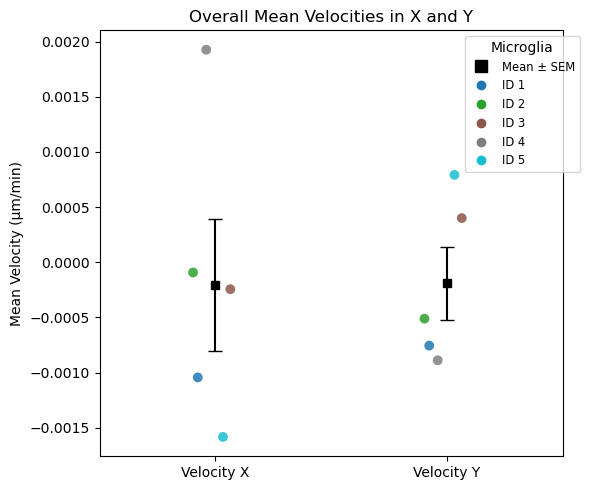

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 1) Load & clean
PATH = '/Users/alexlawson/Masters-Data-Final/Live-imaging/Results/Statistics/al51/Stats/SPOTS/Summary/combined_Velocity.csv'
df = pd.read_csv(PATH)
df = df.dropna(subset=['MicrogliaID','Velocity X','Velocity Y'])

# 2) Color map for MicrogliaID
ids = sorted(df['MicrogliaID'].unique())
cmap = plt.cm.get_cmap('tab10', len(ids))
color_dict = {mid: cmap(i) for i, mid in enumerate(ids)}

# 3) Compute per‑cell means
per_cell = (
    df
    .groupby('MicrogliaID')[['Velocity X','Velocity Y']]
    .mean()
    .reset_index()
)

# 4) Compute overall mean ± SEM across microglia
means = per_cell[['Velocity X','Velocity Y']].mean().values
sems  = per_cell[['Velocity X','Velocity Y']].sem().values

# 5) Plot (stable, per-ID jitter reused for X and Y)
fig, ax = plt.subplots(figsize=(6,5))

x = np.array([0, 1])
labels = ['Velocity X','Velocity Y']

# a) mean ± SEM as black squares with error bars
ax.errorbar(
    x, means, yerr=sems, fmt='s', capsize=5, color='black',
    label='Mean ± SEM', zorder=3
)

# --- Stable jitter per MicrogliaID ---
# width should be < 0.5 so groups don't overlap
width = 0.12

def stable_jitter(key, w=width):
    # deterministic in a session, independent of draw order
    h = hash(str(key)) % 10_000
    return (h / 10_000) * 2*w - w  # maps to [-w, w]

id_jitter = {mid: stable_jitter(mid) for mid in ids}

# b) overlay jittered dots per MicrogliaID (same offset used for X and Y)
for i, comp in enumerate(['Velocity X','Velocity Y']):
    vals = per_cell[comp].values
    x_pos = np.array([i + id_jitter[mid] for mid in per_cell['MicrogliaID']])
    ax.scatter(
        x_pos,
        vals,
        color=[color_dict[mid] for mid in per_cell['MicrogliaID']],
        s=50,
        alpha=0.85,
        linewidths=0.5,
        edgecolors='none',
        zorder=4
    )

# c) labels & title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Velocity (µm/min)')
ax.set_title('Overall Mean Velocities in X and Y')

# keep jitter visible without crossing categories
ax.set_xlim(-0.5, 1.5)

# d) custom legend: mean marker + one dot per ID
handles = [
    Line2D([0],[0], marker='s', color='black', label='Mean ± SEM',
           markersize=8, linestyle='None')
] + [
    Line2D([0],[0], marker='o', color=color_dict[mid],
           label=f'ID {mid}', markersize=6, linestyle='None')
    for mid in ids
]
ax.legend(handles=handles, bbox_to_anchor=(1.05,1), fontsize='small', title='Microglia')

plt.tight_layout()
plt.show()
